In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [58]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [59]:
x_train = train_datagen.flow_from_directory(r"C:\Users\ADMIN\Desktop\flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [60]:
x_test = test_datagen.flow_from_directory(r"C:\Users\ADMIN\Desktop\flowers",target_size = (64,64),
                                        class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [61]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Dense

In [63]:
model=Sequential()

In [64]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [65]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [66]:
model.add(Flatten())

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [69]:
model.add(Dense(5,activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [71]:
len(x_train)

180

In [72]:
model.fit(x_train, epochs = 2, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/2
180/180 [==============================] - 28s 153ms/step - loss: 1.2501 - accuracy: 0.4807 - val_loss: 1.1886 - val_accuracy: 0.5242
Epoch 2/2
180/180 [==============================] - 27s 149ms/step - loss: 1.0602 - accuracy: 0.5719 - val_loss: 1.1136 - val_accuracy: 0.5617


In [73]:
model.save('flowers.h5')

In [74]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [75]:
model=load_model('flowers.h5')

In [76]:
img=image.load_img(r"C:\Users\ADMIN\Desktop\flowers\daisy\107592979_aaa9cdfe78_m.jpg")

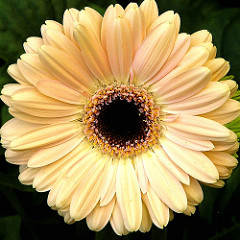

In [77]:
img

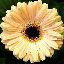

In [78]:
img=image.load_img(r"C:\Users\ADMIN\Desktop\flowers\daisy\107592979_aaa9cdfe78_m.jpg", target_size=(64,64))
img

In [79]:
x=image.img_to_array(img)

In [80]:
x

array([[[35., 68., 11.],
        [31., 54., 12.],
        [34., 55., 14.],
        ...,
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]],

       [[41., 76., 12.],
        [40., 67., 16.],
        [34., 53.,  8.],
        ...,
        [ 0.,  2.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[32., 65., 10.],
        [39., 63., 11.],
        [40., 64., 16.],
        ...,
        [14., 29.,  6.],
        [16., 32.,  5.],
        [13., 27.,  2.]],

       ...,

       [[10., 21.,  4.],
        [ 9., 22.,  2.],
        [16., 30.,  7.],
        ...,
        [ 5., 16.,  2.],
        [ 2.,  7.,  1.],
        [ 4., 11.,  3.]],

       [[ 4., 15.,  1.],
        [ 5., 16.,  0.],
        [14., 30.,  4.],
        ...,
        [ 1.,  3.,  0.],
        [ 4.,  9.,  3.],
        [ 4.,  9.,  3.]],

       [[ 2.,  7.,  1.],
        [11., 22.,  5.],
        [17., 31.,  6.],
        ...,
        [ 2.,  2.,  0.],
        [ 3.,  5.,  2.],
        [ 2., 12.,  1.]]

In [81]:
x=np.expand_dims(x,axis=0)
x

array([[[[35., 68., 11.],
         [31., 54., 12.],
         [34., 55., 14.],
         ...,
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.]],

        [[41., 76., 12.],
         [40., 67., 16.],
         [34., 53.,  8.],
         ...,
         [ 0.,  2.,  1.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],

        [[32., 65., 10.],
         [39., 63., 11.],
         [40., 64., 16.],
         ...,
         [14., 29.,  6.],
         [16., 32.,  5.],
         [13., 27.,  2.]],

        ...,

        [[10., 21.,  4.],
         [ 9., 22.,  2.],
         [16., 30.,  7.],
         ...,
         [ 5., 16.,  2.],
         [ 2.,  7.,  1.],
         [ 4., 11.,  3.]],

        [[ 4., 15.,  1.],
         [ 5., 16.,  0.],
         [14., 30.,  4.],
         ...,
         [ 1.,  3.,  0.],
         [ 4.,  9.,  3.],
         [ 4.,  9.,  3.]],

        [[ 2.,  7.,  1.],
         [11., 22.,  5.],
         [17., 31.,  6.],
         ...,
         [ 2.,  2.,  0.],
        

In [82]:
y=np.argmax(model.predict(x),axis=0)

1/1 [==============================] - 0s 74ms/step


In [83]:
y

array([0, 0, 0, 0, 0], dtype=int64)

In [84]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [85]:
index=['daisy','dandelion','rose','sunflower']

In [86]:
index[y[0]]

'daisy'

In [87]:
img=image.load_img(r"C:\Users\ADMIN\Desktop\flowers\dandelion\751941983_58e1ae3957_m.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','dandelion','rose','sunflower']
index[y[0]]

1/1 [==============================] - 0s 33ms/step


'sunflower'

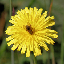

In [88]:
img

In [89]:
img=image.load_img(r"C:\Users\ADMIN\Desktop\flowers\rose\3664842094_5fd60ee26b.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['daisy','rose','dandelion','sunflower']
index[y[0]]

1/1 [==============================] - 0s 27ms/step


'dandelion'

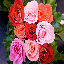

In [90]:
img

In [93]:
img=image.load_img(r"C:\Users\ADMIN\Desktop\flowers\sunflower\3840761441_7c648abf4d_n.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=0)
index=['sunflower','daisy','dandelion','rose']
index[y[0]]

1/1 [==============================] - 0s 22ms/step


'sunflower'

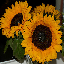

In [94]:
img